In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\hamis\AppData\Local\Temp\ipykernel_12528\3351688524.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  block, node, geometry, local, point = np.genfromtxt(dataFile, delimiter = ';', skip_header=1, dtype=None, unpack=True)


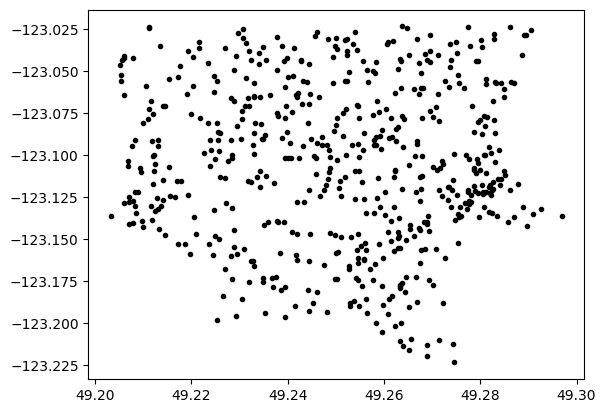

In [2]:
dataFile = 'data/street-lighting-poles.csv'

block, node, geometry, local, point = np.genfromtxt(dataFile, delimiter = ';', skip_header=1, dtype=None, unpack=True)
# BLOCK_NUMBER;NODE_NUMBER;Geom;Geo Local Area;geo_point_2d

df = pd.read_csv(dataFile, delimiter=';')
loc = df['geo_point_2d'].to_numpy()
latitudes = np.empty_like(loc)
longitudes = np.empty_like(loc)
for _, entry in enumerate(loc):
    lat, lon = entry.split(', ')
    latitudes[_] = float(lat)
    longitudes[_] = float(lon)

plt.scatter(x=latitudes[::100], y=longitudes[::100], marker='.', color='k')
plt.show()

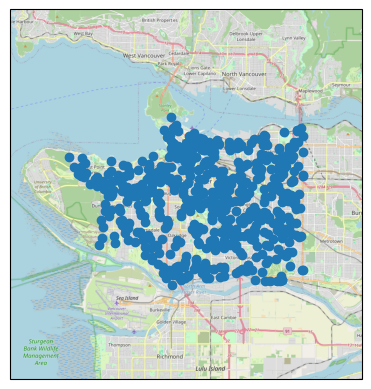

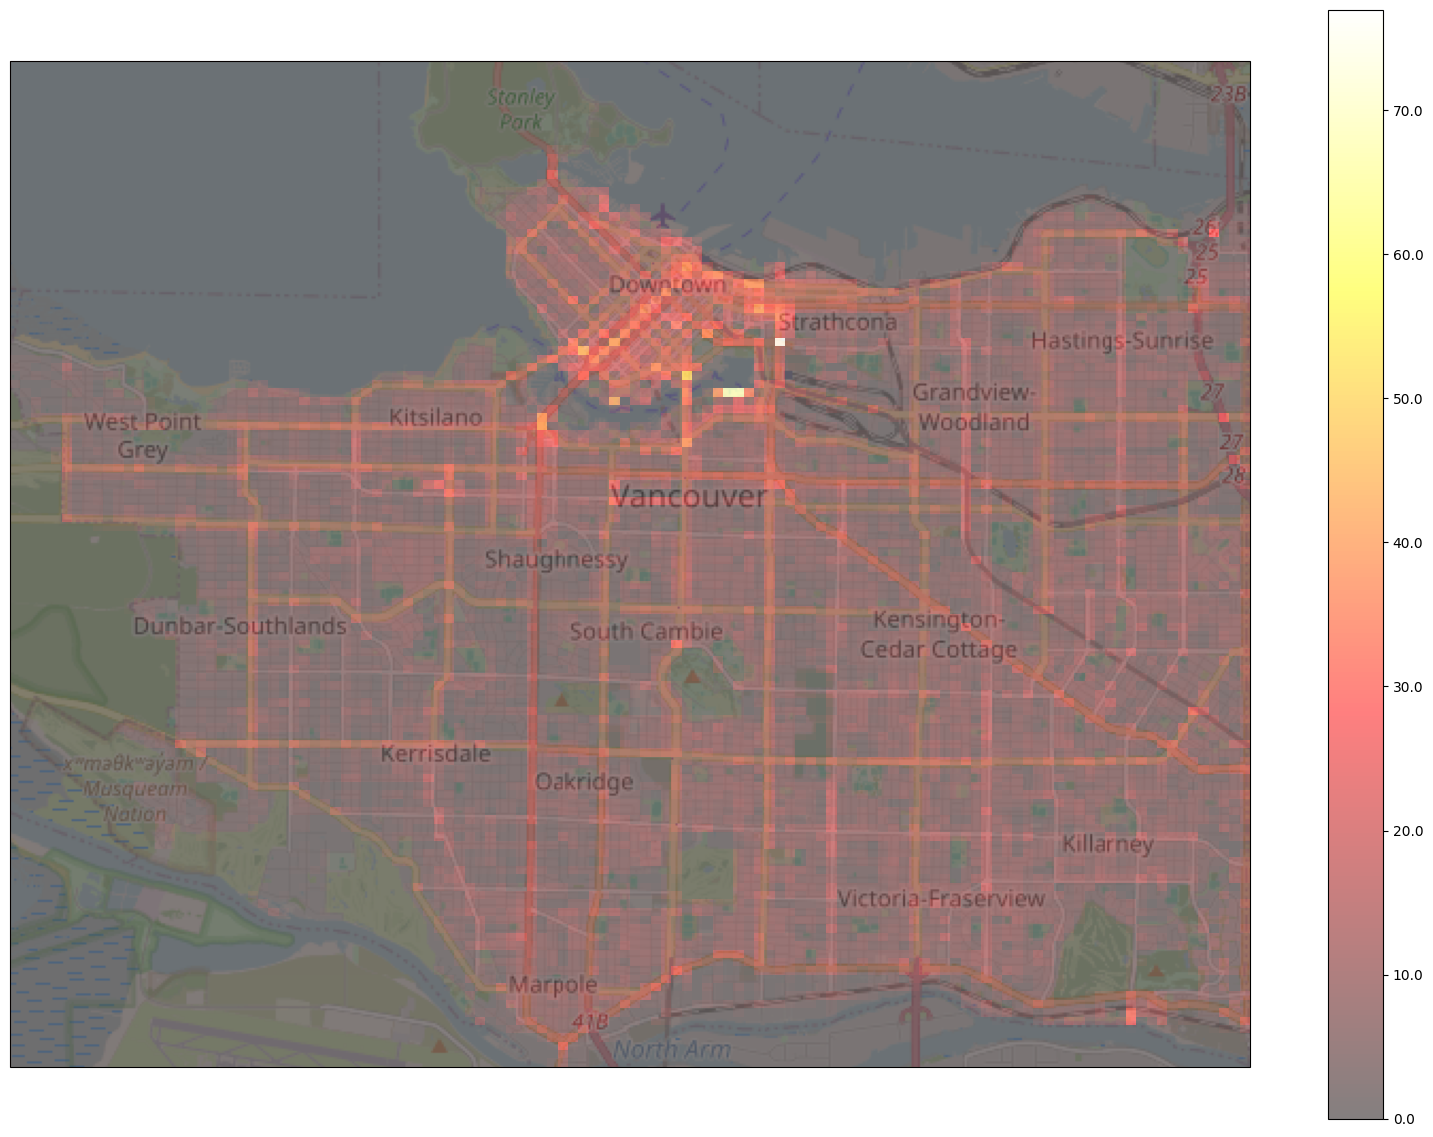

In [29]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

request = cimgt.OSM()

# Bounds: (lon_min, lon_max, lat_min, lat_max):
extent = np.array([np.min(longitudes), np.max(longitudes), np.min(latitudes), np.max(latitudes)]) + np.array([-0.05, 0.05, -0.05, 0.05])

ax = plt.axes(projection=request.crs)
ax.set_extent(extent)
ax.add_image(request, 12, )    # 5 = zoom level

# Just some random points/lines:
plt.scatter(longitudes[::100], latitudes[::100], transform=ccrs.PlateCarree())
# pl.plot([4.92, 9], [51.97, 47], transform=ccrs.PlateCarree())
plt.show()

fig, ax = plt.subplots(figsize=(20,32), subplot_kw=dict(projection=request.crs))
ax.set_extent(extent)
ax.add_image(request, 12, alpha = 0.6)
# do coordinate conversion of (x,y)
xynps = ax.projection.transform_points(ccrs.Geodetic(), longitudes, latitudes)

# make a 2D histogram
h = ax.hist2d(xynps[:,0], xynps[:,1], bins=120, zorder=10, alpha=0.5, cmap='hot')
cbar = plt.colorbar(h[3], ax=ax, shrink=0.45, format='%.1f')  # h[3]: image

plt.show()